In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import results

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
res = results.Results('ZSPEC0.15_0.3nside1024nJack30','test3',30)

In [3]:
res.load_all_data()

In [11]:
out, bins = res.analyze('v',scale=30,nbins=16,tolerance=.1,ratio=.5)

In [19]:
out_tup = (out,bins)

In [21]:
import cPickle as pickle
with open(results.plot_path+'test','wb') as f:
    pickle.dump(out_tup,f)

In [22]:
test_load = pickle.load(open(results.plot_path+'test','rb'))

In [24]:
test_load[0]

[{'d1': array([ 30.31439314,  31.3545929 ,  32.2461927 ,  33.1377925 ,
          34.0293923 ,  34.9209921 ,  35.81259189,  36.70419169,
          37.59579149,  38.48739129,  39.37899109,  40.27059088,
          41.16219068,  42.05379048,  42.94539028,  43.98559004]),
  'd2': array([ 29.71999327,  29.71999327,  29.71999327,  29.71999327,
          29.71999327,  29.71999327,  29.71999327,  29.71999327,
          29.71999327,  29.71999327,  29.71999327,  29.71999327,
          29.71999327,  29.71999327,  29.71999327,  29.71999327]),
  'd3': array([ 14.85999664,  14.85999664,  14.85999664,  14.85999664,
          14.85999664,  14.85999664,  14.85999664,  14.85999664,
          14.85999664,  14.85999664,  14.85999664,  14.85999664,
          14.85999664,  14.85999664,  14.85999664,  14.85999664]),
  'denom': array([ 0.01864363,  0.01826489,  0.01796002,  0.01767181,  0.01739895,
          0.01714024,  0.01689462,  0.01666112,  0.01643888,  0.01622709,
          0.01602505,  0.0158321 ,  0.0

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


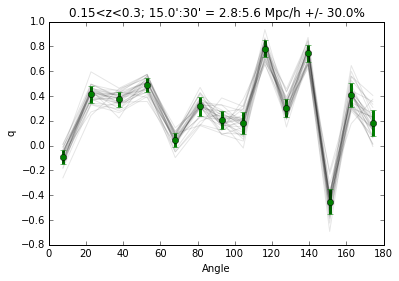

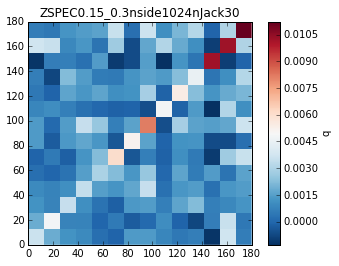

In [5]:
res.make_plots('q',bins,out,scale=30,nbins=16,tolerance=.3,ratio=.5)

In [56]:
import datasets
dset = datasets.BaseDataset.fromfilename(datasets.output_path+'redmagicHD/'+res.dataname)

In [57]:
asdf.min_z

0.15

In [68]:
from astropy.cosmology import FlatLambdaCDM
buzzard_cosmo = FlatLambdaCDM(68.81, .295)

def make_plots(var,bins,out,scale=30,nbins=16,tolerance=.3,ratio=.5):
    out_vec = []
    for res1 in out:
        out_vec.append(res1[var])
    out_vec = np.array(out_vec)
    out_vec = out_vec.T
    print out_vec.shape
    plt.plot(bins,out_vec,color='k',alpha=.1);
    jk_factor = (res.n_jackknife-1.0)/res.n_jackknife
    plt.errorbar(bins,np.mean(out_vec,axis=1),color='g',marker='o',linestyle='.',linewidth=3,yerr=np.sqrt(jk_factor*np.var(out_vec,axis=1)))
    plt.xlabel('Angle')
    plt.ylabel(var)
    dset = datasets.BaseDataset.fromfilename(datasets.output_path+'redmagicHD/'+res.dataname)
    mean_z = np.mean([dset.max_z,dset.min_z])
    lg_dist = np.round(buzzard_cosmo.kpc_comoving_per_arcmin(mean_z).value/1000*scale*buzzard_cosmo.h,1)
    sm_dist = np.round(lg_dist*ratio,1)
    plt.title(str(dset.min_z)+'<z<'+str(dset.max_z)+'; '+str(scale*ratio)+"\':"+str(scale)+"\' = "+str(sm_dist)+':'+str(lg_dist)+' Mpc/h +/- '+str(100*tolerance)+'%')
    plt.figure()
    covmat = jk_factor*np.cov(out_vec)
    plt.imshow(covmat,interpolation='None',origin='lower',extent=[0,180,0,180],cmap='RdBu_r')
    plt.title(res.dataname)
    cbar = plt.colorbar()
    cbar.set_label(var)

(14, 30)


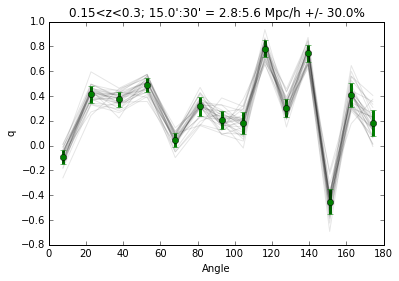

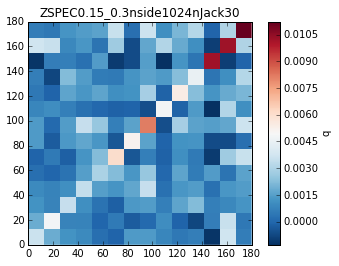

In [69]:
make_plots('q',bins,out,scale=30,nbins=16,tolerance=.3,ratio=.5)

In [6]:
out_vec = []
for res1 in out[0]:
    out_vec.append(res1['q'])
out_vec = np.array(out_vec)

In [7]:
out_vec.shape

(30, 14)

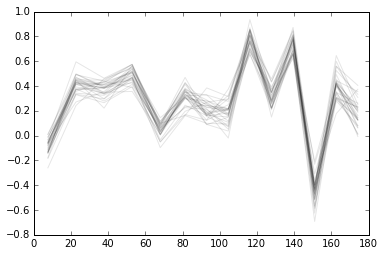

In [12]:
plt.plot(bins,out_vec.T,color='k',alpha=.1);

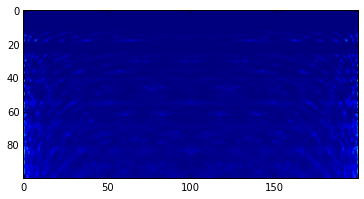

In [149]:
plt.imshow(res.weights[0][50,:,:])

## Old checks

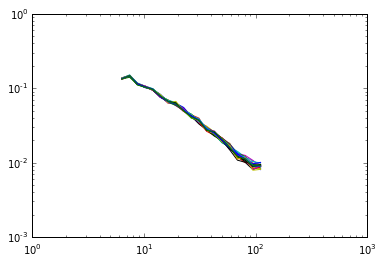

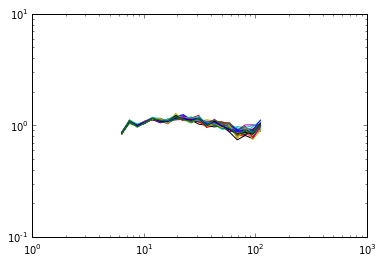

In [49]:
xis = np.array(res.xis).T
plt.loglog(np.exp(res.kk.logr[1:]),xis[1:,:]);
plt.figure()
plt.loglog(np.exp(res.kk.logr[1:]),np.exp(res.kk.logr[1:,np.newaxis])*xis[1:,:]);